# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
training_file = '/home/ubuntu/udacity_wu/CarND-Traffic-Sign-Classifier-Project/train.p'
testing_file = '/home/ubuntu/udacity_wu/CarND-Traffic-Sign-Classifier-Project/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
train_features_all, train_labels_all = train['features'], train['labels']
test_features, test_labels = test['features'], test['labels']

In [3]:
type(train_features_all)

numpy.ndarray

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(train_features_all)

# TODO: Number of testing examples.
n_test = len(test_features)

# TODO: What's the shape of an traffic sign image?
image_shape = [len(train_features_all[0]),len(train_features_all[0][0]), len(train_features_all[0][0][0])]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(test_labels)+1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = [32, 32, 3]
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
import tensorflow as tf
from sklearn import cross_validation
import math
import matplotlib.image as mpimg
import numpy as np
import cv2
import random
# Allow image embeding in notebook
%matplotlib inline

/home/ubuntu/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

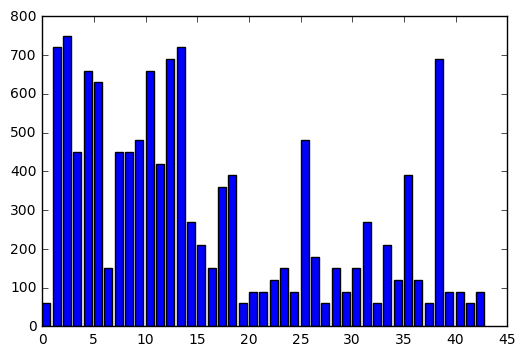

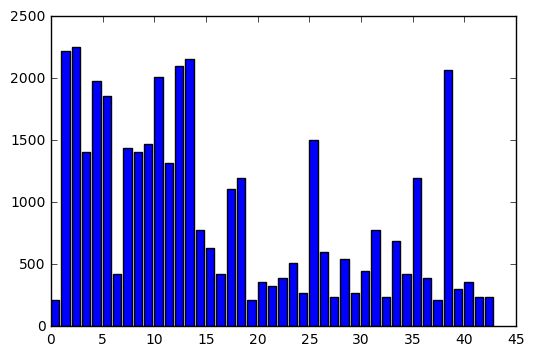

In [5]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

# Visualizations will be shown in the notebook.

%matplotlib inline

def plot_picture(data_features, data_labels):
    for i in range(n_classes):
        for j in range(len(data_labels)):
            if (i == data_labels[j]) :
                print("Class: ", i)
                plt.imshow(data_features[j])
                plt.show()
                break 

def count_picture(data_labels):
    y_value=np.bincount(data_labels)
    fig,ax=plt.subplots()
    ax.bar(range(len(y_value)), y_value)
    plt.show()
    
'''
###plotting traffic sign images

plot_picture(train_features, train_labels)
plot_picture(test_features, test_labels)

'''
###plotting the count of each sign
count_picture(test_labels)
count_picture(train_labels_all)



10


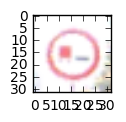

In [6]:
index=random.randint(0, len(train_features_all))
image=train_features_all[index].squeeze()


plt.figure(figsize=(1,1))
plt.imshow(image)
print(train_labels_all[index])


15


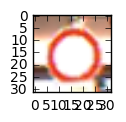

In [7]:
index=random.randint(0, len(test_features))
image=test_features[index].squeeze()


plt.figure(figsize=(1,1))
plt.imshow(image)
print(test_labels[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [8]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
'''
def normalization(self):
    return self/255. *0.8+0.1
'''

'\ndef normalization(self):\n    return self/255. *0.8+0.1\n'

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

(1) Because input data was sorted by class, I randomized it to avoid overfitting.

(2) I want to rotate the original data, but it seems to take so long time to run.

In [9]:
### Generate data additional data (OPTIONAL!)

### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

from sklearn.model_selection import train_test_split

'''

print("Preprocessed the data")
train_features=normalization(train_features)
test_features=normalization(test_features)
print("Finish normalization features")
'''

train_features, valid_features, train_labels, valid_labels=train_test_split(train_features_all, train_labels_all,test_size=0.3, random_state=8234567)
    
print("split the data into training/validation/testing sets")

split the data into training/validation/testing sets


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

(1) I took 30% of the training data as validation data, which seemed enough to not overfit the data. when I found that the result was good, then using the testing data to get the finnal accuracy.

(2) I tried to rotate the data as follows, but it needed more time to run. Therefore, I didn't get the result.

In [10]:
'''
from skimage import transform
'''

'\nfrom skimage import transform\n'

In [11]:
'''
angles = [-5, 5, -10, 10, -15, 15, -20, 20]
inputs_per_class = np.bincount(train_labels)
print(inputs_per_class)

for i in range(len(inputs_per_class)):
    new_features = []
    new_labels = []
    mask = np.where(train_labels == i)

    for j in angles:
        for feature in train_features[mask]:
            new_features.append([transform.rotate(image, j) for image in train_features])
            new_labels.append(i)

    train_features_t = np.append(train_features, new_features, axis=0)
    train_labels_t = np.append(train_labels, new_labels, axis=0)

train_features_t = [transform.rotate(image, 90) for image in train_features]
test_features_t = [transform.rotate(image, 90) for image in test_features]

plt.imshow(train_features_t[0])
plt.show()

plt.imshow(train_features[0])
plt.show()
'''

'\nangles = [-5, 5, -10, 10, -15, 15, -20, 20]\ninputs_per_class = np.bincount(train_labels)\nprint(inputs_per_class)\n\nfor i in range(len(inputs_per_class)):\n    new_features = []\n    new_labels = []\n    mask = np.where(train_labels == i)\n\n    for j in angles:\n        for feature in train_features[mask]:\n            new_features.append([transform.rotate(image, j) for image in train_features])\n            new_labels.append(i)\n\n    train_features_t = np.append(train_features, new_features, axis=0)\n    train_labels_t = np.append(train_labels, new_labels, axis=0)\n\ntrain_features_t = [transform.rotate(image, 90) for image in train_features]\ntest_features_t = [transform.rotate(image, 90) for image in test_features]\n\nplt.imshow(train_features_t[0])\nplt.show()\n\nplt.imshow(train_features[0])\nplt.show()\n'

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

Model architecture:
layer1 and layer 2, which needs 3 step to process the data, as follows:

(1)Convolutional the data

(2)Using tf.nn.relu to activate data, which got from (1)

(3)Then pooling.

Then layer3,layer4 and layer5 are fully connected layers.

********************************************************************


There are 5 layers in this CNN model. It included:

(1) layer1: It was a CNN with a patch size of 5*5, a stride of 1, VALID padding and a depth of  Convolutional. Input = 32x32x3. Output = 28x28x6.

(2) layer2: Do the same thing in the (1). Then we need flatten the data, of which input is 5*5*16, and output is 400

(3) layer3:It is a fully connected layer with a width of 120, of which input is 400, and output is 120. 

(4) layer4:It is a fully connected layer with a width of 84, of which input is 120, and output is 84. 

(5) layer5: It is a fully connected layer with a width of 43, of which input is 84, and output is 43. 



In [12]:
import tensorflow as tf
from sklearn.utils import shuffle

epochs=30
batch_size=128

train_features, train_labels=shuffle(train_features, train_labels)


In [13]:
from tensorflow.contrib.layers import flatten

def LeNet(x):
    mu=0
    sigma=0.1
    
    conv1_w=tf.Variable(tf.truncated_normal(shape=(5,5,3,6),mean=mu,stddev=sigma))
    conv1_b=tf.Variable(tf.zeros(6))
    conv1=tf.nn.conv2d(x,conv1_w,strides=[1,1,1,1],padding='VALID')+conv1_b
    
    conv1=tf.nn.relu(conv1)
    conv1=tf.nn.max_pool(conv1,ksize=[1,2,2,1], strides=[1,2,2,1],padding='VALID')
    
    
    
    
    
    conv2_w=tf.Variable(tf.truncated_normal(shape=(5,5,6,16),mean=mu,stddev=sigma))
    conv2_b=tf.Variable(tf.zeros(16))
    conv2=tf.nn.conv2d(conv1,conv2_w,strides=[1,1,1,1],padding='VALID')+conv2_b
    
    conv2=tf.nn.relu(conv2)
    conv2=tf.nn.max_pool(conv2,ksize=[1,2,2,1], strides=[1,2,2,1],padding='VALID')
    
    
    
    
    fc0= flatten(conv2)
    
    fc1_w=tf.Variable(tf.truncated_normal(shape=(400,120),mean=mu,stddev=sigma))
    fc1_b=tf.Variable(tf.zeros(120))
    fc1=tf.matmul(fc0,fc1_w)+fc1_b
    fc1=tf.nn.relu(fc1)
    
    
    fc2_w=tf.Variable(tf.truncated_normal(shape=(120,84),mean=mu,stddev=sigma))
    fc2_b=tf.Variable(tf.zeros(84))
    fc2=tf.matmul(fc1,fc2_w)+fc2_b
    fc2=tf.nn.relu(fc2)
    
    
    fc3_w=tf.Variable(tf.truncated_normal(shape=(84,43),mean=mu,stddev=sigma))
    fc3_b=tf.Variable(tf.zeros(43))
    logits=tf.matmul(fc2,fc3_w)+fc3_b
    
    return logits
    

In [14]:
features_ph=tf.placeholder(tf.float32,[None, 32,32,3])
labels_ph=tf.placeholder(tf.int32,[None])
one_hot_labels=tf.one_hot(labels_ph, 43)

In [15]:
rate=0.001
logits=LeNet(features_ph)
predicted_labels=tf.argmax(logits,1)
prediction = tf.nn.softmax(logits)
cross_entropy=tf.nn.softmax_cross_entropy_with_logits(logits,one_hot_labels)
loss_operation=tf.reduce_mean(cross_entropy)
optimizer=tf.train.AdamOptimizer(learning_rate=rate)
training_operation= optimizer.minimize(loss_operation)

In [16]:
correct_prediction=tf.equal(tf.argmax(logits,1),tf.argmax(one_hot_labels,1))
accuracy_operation= tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

def evaluate(x_data, y_data):
    num_examples=len(x_data)
    total_accuracy=0
    sess=tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x,batch_y=x_data[offset:offset+batch_size],y_data[offset:offset+batch_size]
        accuracy=sess.run(accuracy_operation, feed_dict={features_ph:batch_x, labels_ph:batch_y})
        total_accuracy+=(accuracy*len(batch_x))
    return total_accuracy/num_examples

In [17]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples=len(train_features)
    
    print("training...")
    for i in range(epochs):
        train_features, train_labels=shuffle(train_features, train_labels)
        for offset in range(0, num_examples, batch_size):
            end=offset+batch_size
            batch_x, batch_y=train_features[offset:end],train_labels[offset:end]
            sess.run(training_operation, feed_dict={features_ph:batch_x, labels_ph:batch_y})
       
        validation_accuracy=evaluate(valid_features, valid_labels)
        print("test accuracy={:.3f}".format(validation_accuracy))
        
    try:
        saver
    except NameError:
        saver=tf.train.Saver()
    saver.save(sess, 'lenet')
    print("model saved")

training...
test accuracy=0.583
test accuracy=0.795
test accuracy=0.865
test accuracy=0.885
test accuracy=0.902
test accuracy=0.906
test accuracy=0.914
test accuracy=0.922
test accuracy=0.929
test accuracy=0.932
test accuracy=0.938
test accuracy=0.936
test accuracy=0.941
test accuracy=0.939
test accuracy=0.940
test accuracy=0.947
test accuracy=0.942
test accuracy=0.942
test accuracy=0.944
test accuracy=0.947
test accuracy=0.948
test accuracy=0.940
test accuracy=0.953
test accuracy=0.941
test accuracy=0.952
test accuracy=0.955
test accuracy=0.943
test accuracy=0.956
test accuracy=0.951
test accuracy=0.961
model saved


In [18]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver=tf.train.import_meta_graph('lenet.meta')
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(test_features, test_labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.886


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**


(1) I used the Adam optimizer with a learning rate of 0.001.

(2) I used a batch size of 128 and 50 training epochs.

After many tests, the learning rate, the size of batch and the training epoch seemed to learn fast enough without getting stuck in a local minimum.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I tried adding more convolution networks but they didn't improve the results a lot
It didn't feel that necessary to add them as there is a low statistical invariance between the pictures we work on.

***************************************************************************

I didn't use more than 30 epochs as the accuracy wasn't improving after that.

(1) when epoch was 10, the accuracy was almost 94%, and test accuracy was 87%

(2) when epoch was 30 or 50, the difference of the accuracy almost the same, which was around 97%, and test accuracy was almost 90%


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

The 20 candidate images were as follows.


The fourth image makes  classification difficult. Maybe because comparing with other picture, its backgroud is more complex, and more bright.

In [29]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

'''

import random
sample_index= random.sample(range(len(train_features)),20)
sample_features=[train_features[i] for i in sample_index]
sample_labels=[train_labels[i] for i in sample_index]



with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver=tf.train.import_meta_graph('lenet.meta')
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predicted_sample=sess.run([predicted_labels], feed_dict={features_ph: sample_features})[0]
    match_count = sum([int(y == y_) for y, y_ in zip(sample_labels, predicted_sample)])
    accuracy= match_count/len(sample_labels)
    print("accuracy:",accuracy)
    print(sample_labels)
    print(predicted_sample)

'''

accuracy: 0.95
[23, 1, 7, 1, 13, 23, 2, 7, 2, 28, 5, 33, 23, 18, 5, 2, 1, 25, 10, 17]
[23  1  7  1 13 30  2  7  2 28  5 33 23 18  5  2  1 25 10 17]


In [31]:
sample_index=[2492, 26467, 21008, 5762, 9748]
sample_features=[train_features[i] for i in sample_index]
sample_labels=[train_labels[i] for i in sample_index]



with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver=tf.train.import_meta_graph('lenet.meta')
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predicted_sample=sess.run([predicted_labels], feed_dict={features_ph: sample_features})[0]
    match_count = sum([int(y == y_) for y, y_ in zip(sample_labels, predicted_sample)])
    accuracy= match_count/len(sample_labels)
    print("accuracy:",accuracy)
    print(sample_labels)
    print(predicted_sample)

accuracy: 0.8
[1, 7, 1, 23, 23]
[ 1  7  1 30 23]


13


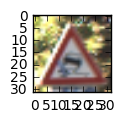

In [33]:
# This picture makes classification difficult
img=train_features[5762].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(img)
print(train_labels[index])
plt.show()

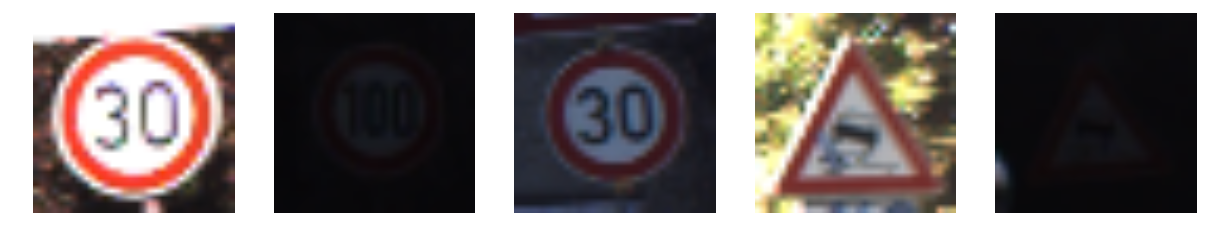

In [34]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import matplotlib.image as mpimg


new_input = []
i=1
plt.figure(figsize=(15, 15))

for index in sample_index:
    img=train_features[index].squeeze()
    plt.subplot(5, 5, i) 
    plt.axis('off')
    new_input.append(img)
    i += 1
    _ = plt.imshow(img)
plt.show()

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

It seems that most of signs were recognized correctly.The accuracy for prediction is 80%. While in the model, the test accuracy is 89%. 

I have checked the softmax probabilities, for the fourth image, the probability of type 30 is 9.23057914e-01, and the type 23 is 7.67592043e-02. Comparing with other type's probatlitly, the difference between them are few.

In [35]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver=tf.train.import_meta_graph('lenet.meta')
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    new_predictions = sess.run(prediction, feed_dict={features_ph: new_input})
    print("prediction:",new_predictions)

prediction: [[  0.00000000e+00   1.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   9.32007151e-37   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  2.78883627e-09   9.06462276e-07   9.45096053e-06   1.63189761e-05
    2.15767477e-06   1.52829208e-03   3.18971232e-08   9.96899605e-01
    1.53117778e-03   4.51349642e-08   2.21101777e-06   1.20501042e-09
    5.62337288e-09   1.2

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

Looking just at the first row we get [1.00000000e+00,   9.32007151e-37], we can confirm these are the 2 largest probabilities. We'll also notice [1, 5] are the corresponding indices.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [37]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver=tf.train.import_meta_graph('lenet.meta')
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    print(sess.run(tf.nn.top_k(prediction, 2), feed_dict={features_ph: new_input}))

TopKV2(values=array([[  1.00000000e+00,   9.32007151e-37],
       [  9.96899605e-01,   1.53117778e-03],
       [  1.00000000e+00,   2.85099097e-11],
       [  9.23057914e-01,   7.67592043e-02],
       [  9.92729485e-01,   2.71403859e-03]], dtype=float32), indices=array([[ 1,  5],
       [ 7,  8],
       [ 1,  5],
       [30, 23],
       [23, 29]], dtype=int32))
